# Graphene toy model

We first import a few useful packages and also [pythtb](http://physics.rutgers.edu/pythtb/).

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import pythtb as tb
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Now define the lattice vectors, the coordinates of the orbitals, and define the graphene model.

In [2]:
lat=[[1.0,0.0],[0.5,np.sqrt(3.0)/2.0]]
orb=[[1./3.,1./3.],[2./3.,2./3.]]
tbg=tb.tb_model(2,2,lat,orb)

We now set the model parameters: onsite energies and hoppings.

In [3]:
delta=0.3
t=-1.0
#
tbg.set_onsite([-delta,delta])
tbg.set_hop(t,0,1,[0,0])
tbg.set_hop(t,1,0,[1,0])
tbg.set_hop(t,1,0,[0,1])

We can get a printout of our model.

In [4]:
tbg.display()

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 2
r-space dimension           = 2
number of spin components   = 1
periodic directions         = [0, 1]
number of orbitals          = 2
number of electronic states = 2
lattice vectors:
 #  0  ===>  [     1.0 ,     0.0 ]
 #  1  ===>  [     0.5 ,   0.866 ]
positions of orbitals:
 #  0  ===>  [  0.3333 ,  0.3333 ]
 #  1  ===>  [  0.6667 ,  0.6667 ]
site energies:
 #  0  ===>      -0.3
 #  1  ===>       0.3
hoppings:
<  0 | H |  1 + [  0 ,  0 ] >     ===>     -1.0 +     0.0 i
<  1 | H |  0 + [  1 ,  0 ] >     ===>     -1.0 +     0.0 i
<  1 | H |  0 + [  0 ,  1 ] >     ===>     -1.0 +     0.0 i



Now we define the k-points where we are going to claculate the bands and print the result.

In [5]:
path=[[1.0,0.0],[0.0,1.0]]
kpts=tb.k_path(path,200)
print '---------------------------------------'
print 'report of k-point path'
print '---------------------------------------'
print 'Path runs over',len(kpts),'k-points connecting:'
for k in path:
    print k
print


---------------------------------------
report of k-point path
---------------------------------------
Path runs over 201 k-points connecting:
[1.0, 0.0]
[0.0, 1.0]



Now we are ready to do the actual calculation

In [6]:
evals=tbg.solve_all(kpts)

We now plot the band structure.

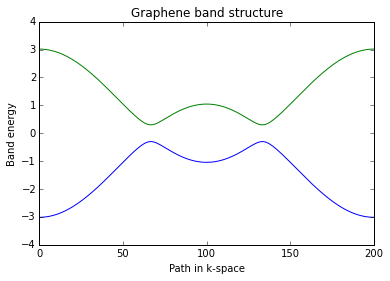

In [7]:
fig=pl.figure()
# plot first band
pl.plot(evals[0])
# plot second band
pl.plot(evals[1])
# put title on top
pl.title("Graphene band structure")
pl.xlabel("Path in k-space")
pl.ylabel("Band energy")
pl.show()

The bands are ploted in a path that goes $\Gamma\rightarrow K\rightarrow M\rightarrow K\rightarrow \Gamma$